Temperature          0
Relative Humidity    0
Wind Speed           0
Rain                 0
FFMC                 0
DMC                  0
ISI                  0
FWI                  0
Region_encoded       0
dtype: int64
Temperature          0
Relative Humidity    0
Wind Speed           0
Rain                 0
FFMC                 0
DMC                  0
ISI                  0
FWI                  0
Region_encoded       0
dtype: int64


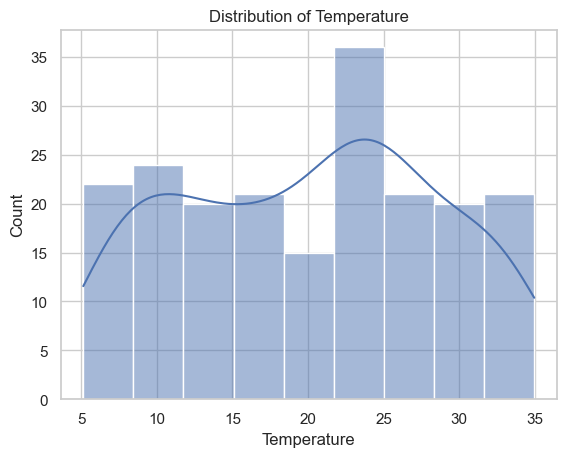

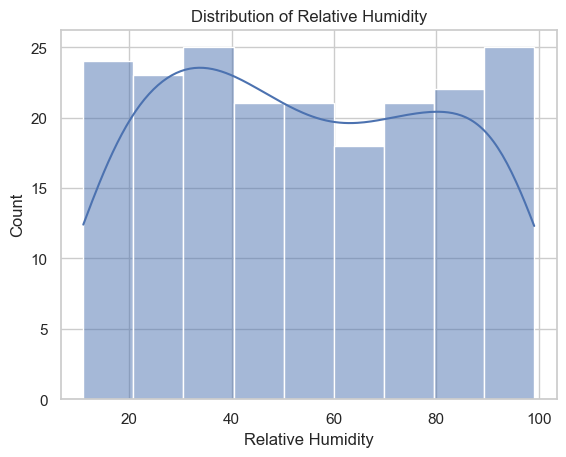

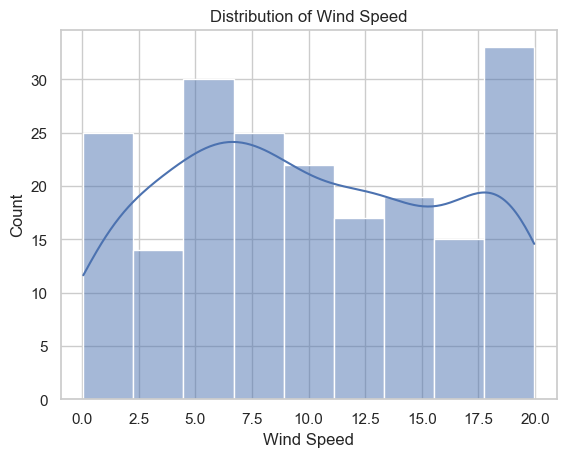

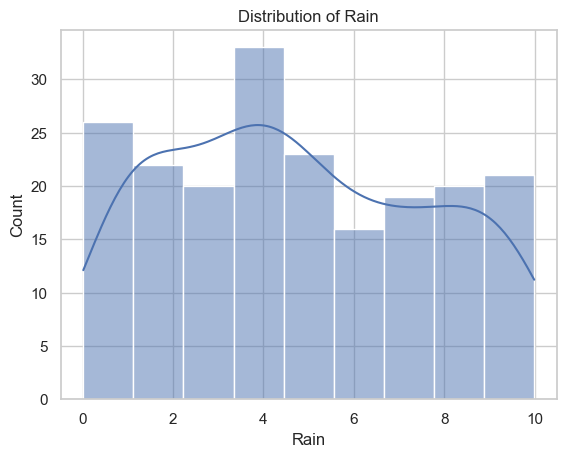

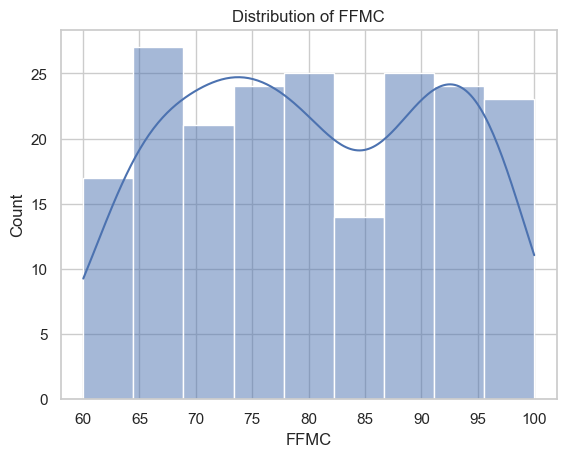

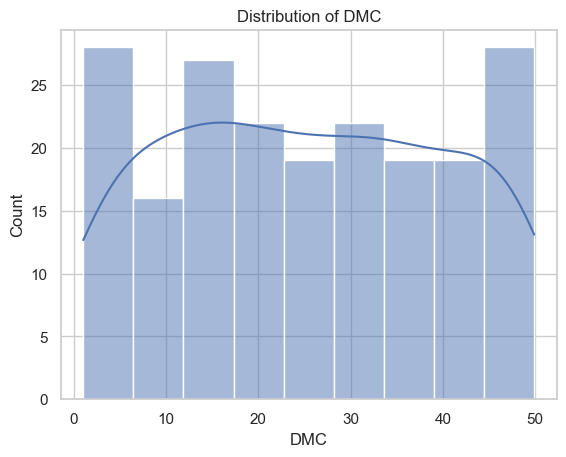

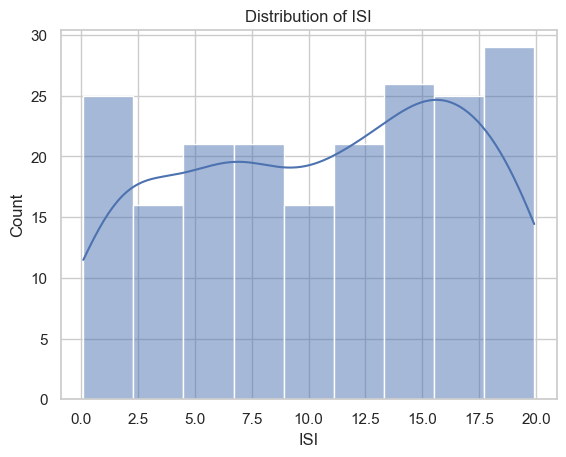

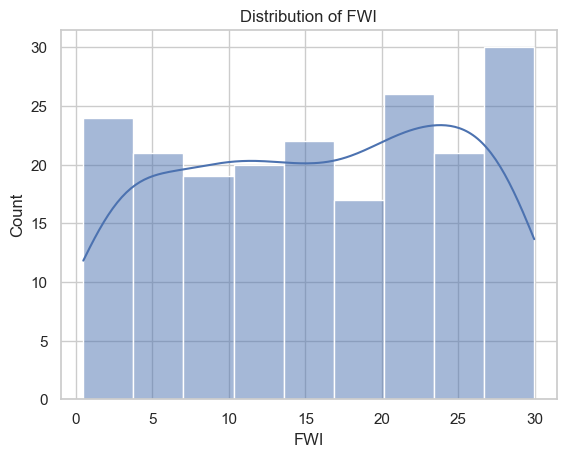

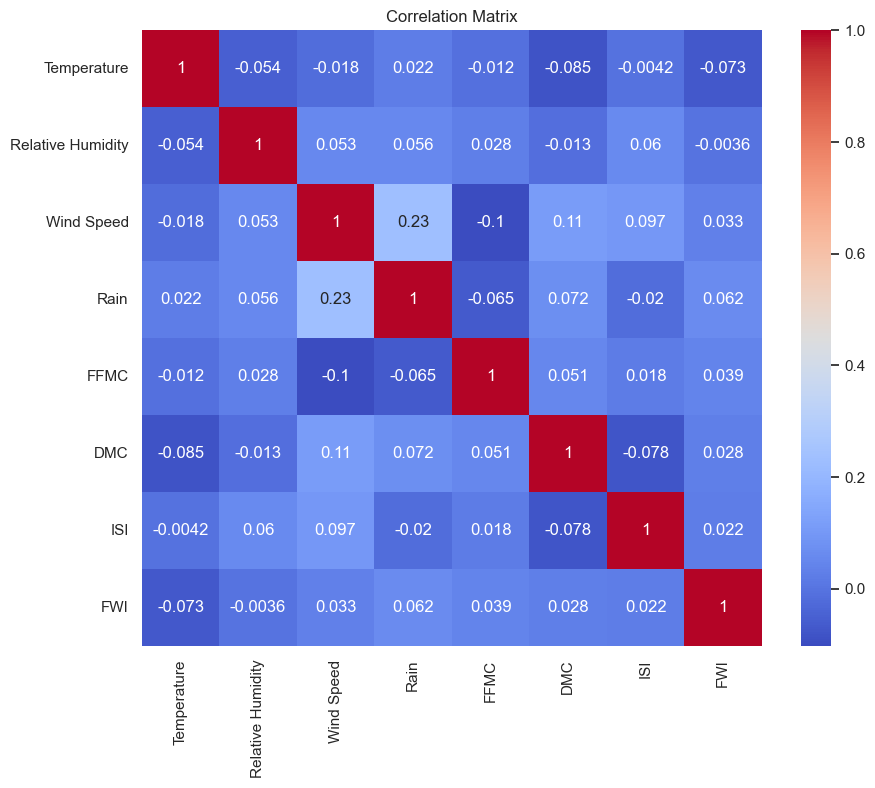

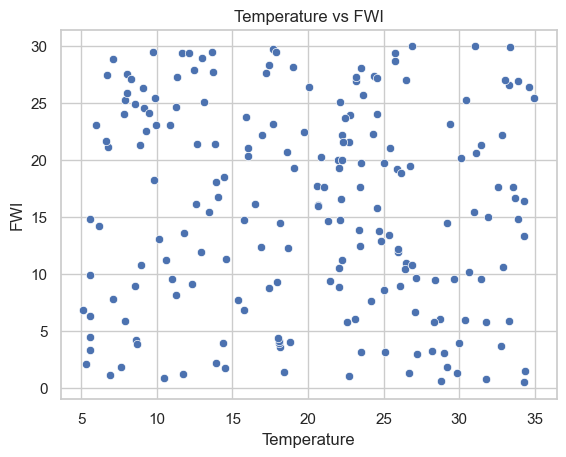

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        200 non-null    float64
 1   Relative Humidity  200 non-null    float64
 2   Wind Speed         200 non-null    float64
 3   Rain               200 non-null    float64
 4   FFMC               200 non-null    float64
 5   DMC                200 non-null    float64
 6   ISI                200 non-null    float64
 7   FWI                200 non-null    float64
 8   Region_encoded     200 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 13.4 KB
None
   Temperature  Relative Humidity  Wind Speed      Rain       FFMC        DMC  \
0    21.464405          38.061629    8.025190  1.746584  61.599712  30.051133   
1    26.455681          72.670914   18.585828  3.279880  85.588204   1.493121   
2    23.082901          43.997666    1.992299  6.803487  76.332116  2

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')
if 'df' not in globals():
    loaded = False
    for fname in ['FWI_Dataset.csv', 'cleaned_FWI_Dataset.csv']:
        try:
            df = pd.read_csv(fname)
            print(f"Loaded dataset from {fname}")
            loaded = True
            break
        except FileNotFoundError:
            continue

    if not loaded:
        print(
            "Warning: dataset files not found. Creating a synthetic sample DataFrame for demonstration. "
            "Please provide 'forestfires.csv' or 'cleaned_forest_fires.csv' to use real data."
        )
        np.random.seed(0)
        n = 200
        df = pd.DataFrame({
            'Temperature': np.random.uniform(5, 35, size=n),
            'Relative Humidity': np.random.uniform(10, 100, size=n),
            'Wind Speed': np.random.uniform(0, 20, size=n),
            'Rain': np.random.uniform(0, 10, size=n),
            'FFMC': np.random.uniform(60, 100, size=n),
            'DMC': np.random.uniform(1, 50, size=n),
            'ISI': np.random.uniform(0, 20, size=n),
            'FWI': np.random.uniform(0, 30, size=n),
            'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n)
        })

print(df.isnull().sum())

numerical_cols = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC', 'ISI', 'FWI']
for col in numerical_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

if 'Region' in df.columns and df['Region'].isnull().sum() > 0:
    df['Region'].fillna(df['Region'].mode()[0], inplace=True)

print(df.isnull().sum())

for col in numerical_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plt.figure(figsize=(10, 8))
corr_cols = [c for c in numerical_cols if c in df.columns]
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if {'Temperature', 'FWI'}.issubset(df.columns):
    plt.figure()
    sns.scatterplot(x='Temperature', y='FWI', data=df)
    plt.title('Temperature vs FWI')
    plt.show()

le = LabelEncoder()
if 'Region' in df.columns:
    df['Region_encoded'] = le.fit_transform(df['Region'])
    df.drop('Region', axis=1, inplace=True)

print(df.info())
print(df.head())

df.to_csv('cleaned_FWI_Dataset.csv', index=False)
